## Lab1 Exploring Data

1. 使用字符串操作获取“This is the first data mining class.”中所有“is”的位置(index).

2. 分别使用txt读取和csv读取“iris.data”,并按行print出来

3. 理解iris数据集的四种属性（attribute）和分类类型（class）的数据类型

4. 使用numpy或pandas计算sepal length，sepal width，petal length，petal width的最大值、最小值、平均值、方差，并print出来

5. 使用min-max标准化方法对各属性值进行预处理，并存储为iris_norm.data文件

6. 使用pandas和matplotlib的pyplot将各属性的基础数据探索值可视化画出，要求：A）至少包括4中的四种值，B）个性化设置显示样式


# 字符串操作

> Task:
> 
> 使用字符串操作获取“This is the first data mining class.”中所有“is”的位置(index).

Python中内置了一系列字符串的操作，如果需要找出子串在字符串中的位置，可以使用`.find()`方法。

> Docstring:
> S.find(sub[, start[, end]]) -> int
>
> Return the lowest index in S where substring sub is found,
> such that sub is contained within S[start:end].  Optional
> arguments start and end are interpreted as in slice notation.

In [1]:
str = 'This is the first data mining class.'
substr = 'is'

print(str.find(substr))

2


返回了第一个`is`的位置index为2，Th`is` is the first data mining class.

Task的要求是找出所有`is`的位置，因此需要使用`find()`方法的其他参数来实现，这里的start指定了在父字符串中开始的位置，所以当我们完成一次搜索，找出了结果之后，就可以从当前位置的下一个位置开始继续搜索，直到整个字符串被搜索完为止。因此可以定义一个循环结构重复调用`find()`方法来解决这个问题。


In [2]:
index_list = [] #创建空列表存储list
index = 0
while True:
    index = str.find(substr,index)
    if index == -1: break #剩余子串找不到匹配字符串时返回-1，应跳出循环。
    index_list.append(index)
    index += 1

print("starting index of string \'is\':",index_list)

starting index of string 'is': [2, 5]


成功找出了所有的`is`：Th`is` `is` the first data mining class.

# 文件读取

> 分别使用txt读取和csv读取“iris.data”,并按行print出来

数据文件`iris.data`和`iris.name`文件放在/data文件夹下。

## 使用普通文本读取

使用内置的`open()`方法即可读取文件。

> open(
>
> ​    file,
>
> ​    mode='r',
>
> ​    buffering=-1,
>
> ​    encoding=None,
>
> ​    errors=None,
>
> ​    newline=None,
>
> ​    closefd=True,
>
> ​    opener=None,
>
> )
>
> Docstring:
>
> Open file and return a stream.  Raise IOError upon failure.
>
> 

读取了文件对象之后，可以使用`readline()`,`readlines()`按行读取内容。

前者是依次读取一行，后者是将文件整个读取，按行存储为一个列表。

In [3]:
f = open('./data/iris.data','r')#mode参数指定为r表明是读取文件
print(f.readline())
print(f.readline())

5.1,3.5,1.4,0.2,Iris-setosa

4.9,3.0,1.4,0.2,Iris-setosa



In [4]:
f = open('./data/iris.data','r')
lines = f.readlines()
print(len(lines))
display(lines[:3])
display(lines[-3:])

151


['5.1,3.5,1.4,0.2,Iris-setosa\n',
 '4.9,3.0,1.4,0.2,Iris-setosa\n',
 '4.7,3.2,1.3,0.2,Iris-setosa\n']

['6.2,3.4,5.4,2.3,Iris-virginica\n', '5.9,3.0,5.1,1.8,Iris-virginica\n', '\n']

## 使用csv读取文件

从刚才以普通方式读取文件的输出结果来看，iris.data实质上是一个逗号分隔的表格文件（csv，comma-separated values），一共有5列151行。(最后一行为空）

考虑这种实质上非常结构化的文件格式，可以使用`csv`包直接进行读取。`csv`包内置的`readher()`函数能够解析每一行，将每一行的内容存储为结构化的列表（不是list，而是一个可迭代的对象），最后将所有数据存储为一个大列表。

In [5]:
import csv
f = open('./data/iris.data','r')
lines = csv.reader(f)
print(type(lines))
i = 0
for row in lines:
    print(row)
    i += 1
    if i > 2: break

<class '_csv.reader'>
['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.0', '1.4', '0.2', 'Iris-setosa']
['4.7', '3.2', '1.3', '0.2', 'Iris-setosa']


In [6]:
lines[0]

TypeError: '_csv.reader' object is not subscriptable

可以看出，这种类虽然可以迭代，但是是不能像list一样切片操作。不过我们可以将其转化为list，这样可以方便地进行切片（其实转换为array和dataframe能有更多高效的操作）

In [7]:
lines_list = list(lines)
print(type(lines_list))
display(lines_list[:3])

<class 'list'>


[['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa']]

# 数据类型理解

> 理解iris数据集的四种属性（attribute）和分类类型（class）的数据类型

iris数据集的字段名行存储在`iris.names`文件中，可以读取查看。

In [ ]:
f = open('./data/iris.names','r')#mode参数指定为r表明是读取文件
lines = f.readlines()
for line in lines:
    print(line)

输出过长，在此省略。

我们只对数据感兴趣，关键信息及解读如下：

1. 数据的勘误

> This data differs from the data presented in Fishers article
>
>	(identified by Steve Chadwick,  spchadwick@espeedaz.net )
>
>	The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa"
>
>	where the error is in the fourth feature.
>
>	The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa"
>
>	where the errors are in the second and third features.  

2. 数据的描述
> Number of Instances: 150 (50 in each of three classes)
>
> Number of Attributes: 4 numeric, predictive attributes and the class
>
>  Attribute Information:
>
>   1. sepal length in cm
>
>   2. sepal width in cm
>
>   3. petal length in cm
>
>   4. petal width in cm
>
>   5. class: 
>
>      -- Iris Setosa
>
>      -- Iris Versicolour
>
>      -- Iris Virginica

一共150行5列数据，4列为数值型（ratio），1列为类别（nominal）。

4列数据分别为花萼长度、花萼宽度、花瓣长度、花瓣宽度。类型是鸢尾花的类型，只有三种取值。每种样本各占总量的$\dfrac{1}{3}$。

根据以上描述可以判断，**`sepal length`,`sepal width`, `petal length`, `petal width`四列数据属性的类型为连续的、比例的。而`class`列的数据是标称的、离散的。**


# 数据描述性统计

> 使用numpy或pandas计算sepal length，sepal width，petal length，petal width的最大值、最小值、平均值、方差，并print出来

对于这类简单描述统计任务，可以使用`pandas`库进行操作。

首先读取文件,`pandas`内置的`read_csv()`方法能够极为方便地读取csv文件。需要注意的是，因为data文件不含表头，为了后续操作的方便，我们可以在读取时定义表头名称。

In [9]:
import pandas as pd
data = pd.read_csv('./data/iris.data',header=None,names=['sepal length','sepal width','petal length','petal width','Class'])# header表明文件中没有列名，首行按数据读取。再通过names指定列名

In [10]:
display(data.head())

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


对于dataframe文件进行简单的描述性统计非常方便，这些统计都有对应的方法：

In [11]:
data.max() #最大值

sepal length               7.9
sepal width                4.4
petal length               6.9
petal width                2.5
Class           Iris-virginica
dtype: object

In [12]:
data.min() #最小值

sepal length            4.3
sepal width               2
petal length              1
petal width             0.1
Class           Iris-setosa
dtype: object

In [13]:
data.mean() #平均值

sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

In [14]:
data.var() #方差

sepal length    0.685694
sepal width     0.188004
petal length    3.113179
petal width     0.582414
dtype: float64

对于标称型、离散型数据，没有均值、方差，在计算均值时pandas会自行忽略。

事实上，对于这类简单的描述统计任务，`pandas`有一个一步到位的方法`describe()`，直接一次性输出。

除了以上指标，`describe`还会输出计数和四分位数。这一方法仅对识别为连续属性生效。

In [15]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 数据处理（标准化）与保存

> 使用min-max标准化方法对各属性值进行预处理，并存储为iris_norm.data文件

min-max标准化方式：

对序列$x_1,x_2,...,x_n$进行min-max标准化变换：

$$
y_i = \dfrac{x_i-\min\limits_{1\le i\le n}(x_i)}{\max\limits_{i \le j \le n}(x_j)-\min\limits_{i \le j \le n}(x_j)}
$$

得到的新序列$y_1,y_2,...,y_n \in [0,1]$且无量纲。

实际上，对每一列数据的处理方式都是相同的，对于这种批量操作，`pandas`可以很高效地完成，只需要一行即可。不过需要注意先要将标称数据分隔开，最后再合并回来。

In [16]:
datax = data.iloc[:,:4]
data_norm = (datax-datax.min())/(datax.max()-datax.min())
data_norm.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


通过描述性统计可以看到所有的离散型数据都标准化到了[0,1]之间。

下一步只需要与class列合并，就可以存储了。

In [17]:
data_norm['Class'] = data['Class']
display(data_norm.tail())

,sepal length,sepal width,petal length,petal width,Class
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica
149,0.444444,0.416667,0.694915,0.708333,Iris-virginica


`pandas`的存储和读取一样简单，内置了`to_csv()`函数可以保存。

In [18]:
data_norm.to_csv('./data/iris_norm.data',index=False) # 不保存索引值

# 数据可视化

> 使用pandas和matplotlib的pyplot将各属性的**基础数据**探索值可视化画出，要求：
>
> A. 至少包括4中的四种值
> 
> B. 个性化设置显示样式

`pandas`内置了一部分可视化方法，例如箱型图：

<AxesSubplot:>

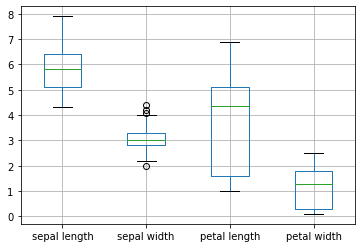

In [19]:
%matplotlib inline

data.boxplot()

<AxesSubplot:>

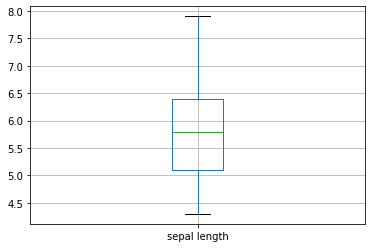

In [20]:
data[['sepal length']].boxplot() 

`boxplot()`方法只能应用于DataFrame对象，只用一对`[]`获得的是Series对象，用两对`[]`获取的DataFrame对象可以应用`boxplot()`方法。

<AxesSubplot:ylabel='Density'>

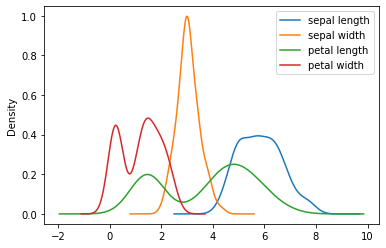

In [21]:
data.plot(kind='kde') # 密度图

可以使用`matplotlib`库获得更多可视化形式，调整更多参数；

In [22]:
list(data.columns)[:4]

['sepal length', 'sepal width', 'petal length', 'petal width']

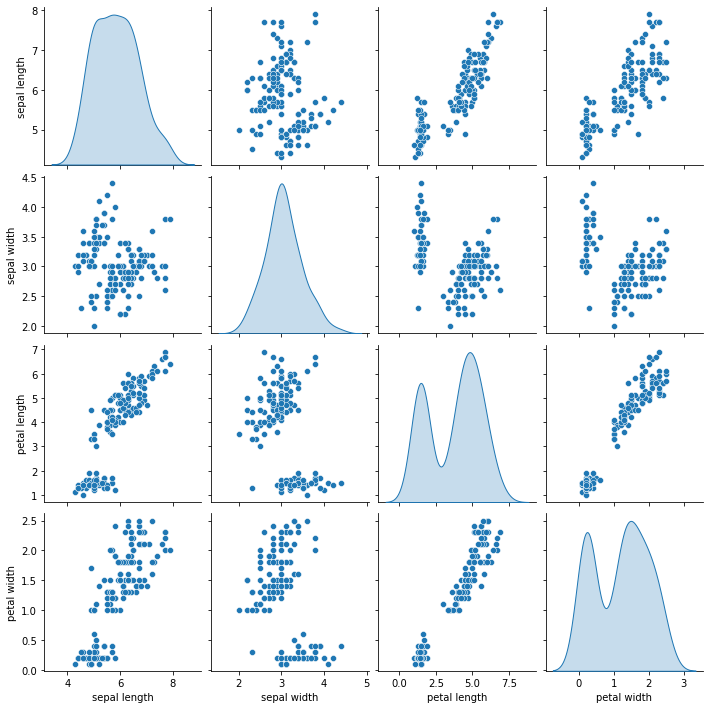

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns #可以理解为matplotlib的扩展包

q = sns.pairplot(data=data, diag_kind='kde')# kde：对角线图表用KDE方法绘制（统计学）

利用这种散点图矩阵，我们可以观察两两变量之间的关系。如图，横纵轴我们可以分别选定两个属性，确定一个散点图，分析这二者之间存在怎样的一种关系。或者，可以选取相同属性，即对角的四幅图，查看其分布情况。

因为实际上涉及到的花有三类，我们可以区分开来。一种思路是将数据按`Class`列分开，另一种思路是就在这个图里给点上色。

对于非对角的散点图，可能不容易看出相关关系，我们可以控制参数，绘制这些散点图的拟合曲线。

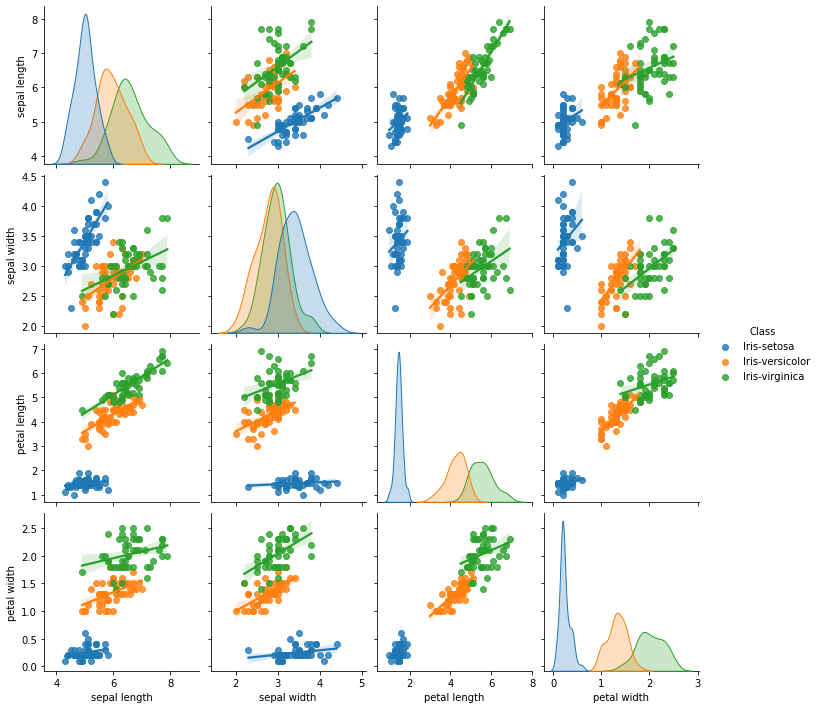

In [24]:
q = sns.pairplot(data=data, diag_kind='kde',hue='Class', kind='reg')# hue参数指定用于分类的列名（须含在data中），kind=reg增加一根回归分析的拟合曲线

可以看到，通过对可视化参数进行调整对输出图表进行美化后，图表的可解释性上升了很多，例如我们可以从图中得到一些结论，例如

1. 各类鸢尾花的花萼长度和花萼宽度几乎呈现正相关的关系

2. 各类鸢尾花的花瓣长度和宽度的分布不同，setosa的花瓣长度和宽度都分布在较小的范围（[0,1]），而virginica的花瓣长度和宽度主要分布在较大的范围（[1.5,3]）。而三者的花萼宽度分布都比较集中，且存在明显的重叠现象。

散点图矩阵很方便也很直观，但是如果要绘制单个图的话，可以进行更多的属性设置，如`marker`限定点的类型。`legend`增加图例等。也可以给图表规定标题、横纵坐标等。虽然可能操作步骤会较为繁琐，但是能够获得更多的个性化设置。

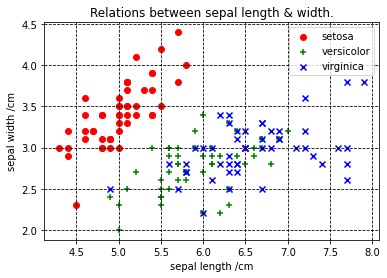

In [25]:
setosa = data[data['Class']=='Iris-setosa']
versicolor  = data[data['Class']=='Iris-versicolor']
virginica = data[data['Class']=='Iris-virginica']

plt.figure()
plt.scatter(setosa['sepal length'],setosa['sepal width'],c='r',marker='o',label='setosa')
plt.scatter(versicolor['sepal length'],versicolor['sepal width'],c='g',marker='+',label='versicolor')
plt.scatter(virginica['sepal length'],virginica['sepal width'],c='b',marker='x',label='virginica')
plt.grid(ls='--',c='black') #添加参考线
plt.xlabel('sepal length /cm') #设置轴标题
plt.ylabel('sepal width /cm')
plt.title('Relations between sepal length & width.') #设置表标题
plt.legend()
plt.show()